<a href="https://colab.research.google.com/github/ThinhNguyen209/CS114.K21.KHTN/blob/master/FINAL_PROJECT/Fruit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ĐỒ ÁN MÔN MACHINE LEARNING


## TÊN ĐỒ ÁN: DỰ ĐOÁN LOẠI TRÁI CÂY TRONG ẢNH

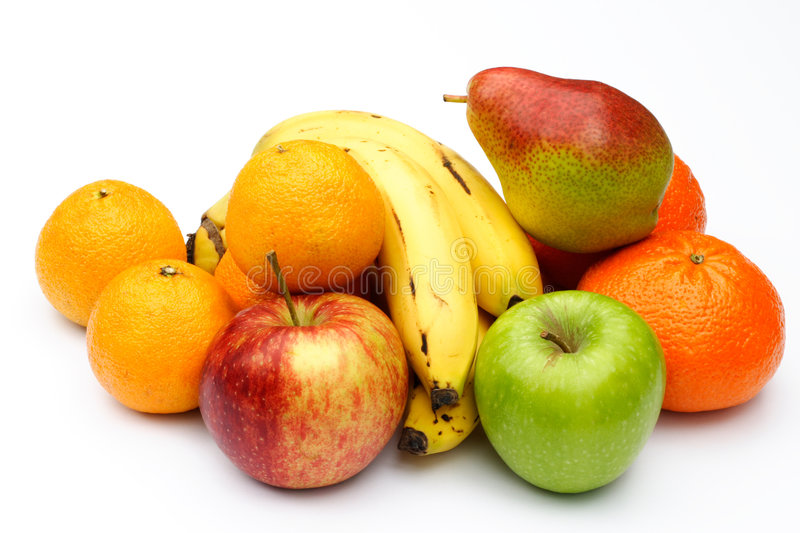

In [ ]:
from IPython.display import Image
Image('/content/gdrive/My Drive/fruit.jpg')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from joblib import dump,load

#Chuẩn bị dataset

1. Tiền xử lí ảnh

In [11]:
def load_image (path):
  image_list=[]
  label=[]
  for name_fruit in os.listdir(path):
    for image in os.listdir(path + "/" + name_fruit):
      #Tải ảnh 
      img= cv2.imread(path+'/'+ name_fruit +'/'+ image)
      #Đặt lại kích thước
      img= cv2.resize(img, (32,32))
      #Chuyển hệ màu
      img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      #Dán nhãn
      image_list.append(img)
      label.append(name_fruit)
  return image_list, label


In [12]:
#Tập train
x_train, y_train= load_image("/content/gdrive/My Drive/Dataset/Train Dataset")

In [ ]:
print(len(x_train))
print(len(y_train))

11937
11937


In [ ]:
#Tập test
x_test, y_test= load_image("/content/gdrive/My Drive/Dataset/Test dataset")

In [ ]:
print(len(x_test))
print(len(y_test))

2400
2400


Custard_apple


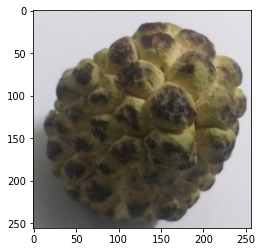

In [ ]:
#Show image
plt.imshow(x_train[200])
print(y_train[200])



2. Rút trích đặt trưng


Dùng HOG (histogram of oriented gradients): 
- Xác định đối tượng trong ảnh
- Lấy thông tin về sự phân bố cường độ (intensity gradient) hoặc hướng (edge directins) để mô tả đối tương trong ảnh 

In [14]:
from skimage.feature import hog

In [15]:
def hog_feature(image_dataset):
  feature_list=[]
  for img in image_dataset:
    feature= hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True)
    feature_list.append(feature)
  return feature_list

Lấy đặc trưng ở tập train

In [ ]:
hog_x_train= hog_feature(x_train)

In [ ]:
#Chuyển qua mảng và save đặc trưng
hog_x_train= np.asarray(hog_x_train)
np.save('hog_x_train',hog_x_train)

In [ ]:
y_train= np.asarray(y_train)
np.save('y_train', y_train)

In [ ]:
print(hog_x_train.shape)
print(y_train.shape)

(11937, 34596)
(11937,)


Lấy đặc trưng ở tập test

In [ ]:
hog_x_test= hog_feature(x_test)

In [ ]:
#Chuyển qua mảng và save đặc trưng
hog_x_test= np.asarray(hog_x_test)
np.save('hog_x_test',hog_x_test)

In [ ]:
y_test= np.asarray(y_test)
np.save('y_test', y_test)

In [ ]:
print(hog_x_test.shape)
print(y_test.shape)

(2400, 34596)
(2400,)


#Chọn và train model

- SVC của Support Vector Machine
- KNN - KNeighborsClassifier
- DecisionTreeClassifier

1. Support Vector Machine - SVC

In [ ]:
from sklearn.svm import SVC
SVC_model = SVC()

In [ ]:
SVC_model.fit(hog_x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Lưu model
dump(SVC_model,"SVC_model.joblib")

['SVC_model.joblib']

*2*. KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
KNN_model.fit(hog_x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
#Lưu model
dump(KNN_model,"KNN_model.joblib")

['KNN_model.joblib']

3. DecisionTreeClassifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC_model= DecisionTreeClassifier()

In [ ]:
DTC_model.fit(hog_x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Lưu model
dump(DTC_model, 'DTC_model.joblib')

['DTC_model.joblib']

#Đánh giá các model

**bold text**- Các tiêu chuẩn đánh giá:
  - Accuracy: số sample dự đoán đúng/ tổng số sample trong dataset
  - Precision & Recall:
    + Precision: số sample dự đoán đúng của class_i/ tổng số sample dự đoán là của class_i
    + Recall: số sample dự đoán đúng của class_i/ tổng số sample của class_i

    => f1-score: tính "trung bình" của precision và recall

    f1-score= 2(recall x precision) / (recall + precision)

   - Dùng confusion matrix để thể hiện rõ thông số về precision và recall
  

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [9]:
def Confusion_matrix(model, x_test, y_test):
    class_names=[ "Táo",     
                  "Bơ",      
                  "Chuối",    
                  "Dừa",     
                  "Mãng cầu",     
                  "Thanh long",     
                  "Ổi",     
                  "Xoài",     
                  "Cam",     
                  "Mận",     
                  "Khế",     
                  "Dưa hấu"
                ]
    fig, ax = plt.subplots(figsize=(15, 15))
    plot_confusion_matrix(model, x_test, y_test,
                          display_labels=class_names,
                          cmap=plt.cm.Blues,
                          ax=ax)
    
    plt.show()

1. DecisionTreeClassifier


In [ ]:
y_pred= DTC_model.predict(hog_x_test)

In [ ]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

        Apple       0.55      0.61      0.58       200
      Avocado       0.24      0.23      0.23       200
       Banana       0.25      0.22      0.23       200
      Coconut       0.45      0.34      0.39       200
Custard_apple       0.22      0.20      0.21       200
 Dragon_fruit       0.45      0.31      0.37       200
        Guava       0.10      0.08      0.09       200
        Mango       0.14      0.13      0.13       200
       Orange       0.31      0.48      0.38       200
         Plum       0.22      0.29      0.25       200
   Star_fruit       0.30      0.23      0.26       200
   Watermelon       0.29      0.39      0.33       200

     accuracy                           0.29      2400
    macro avg       0.29      0.29      0.29      2400
 weighted avg       0.29      0.29      0.29      2400



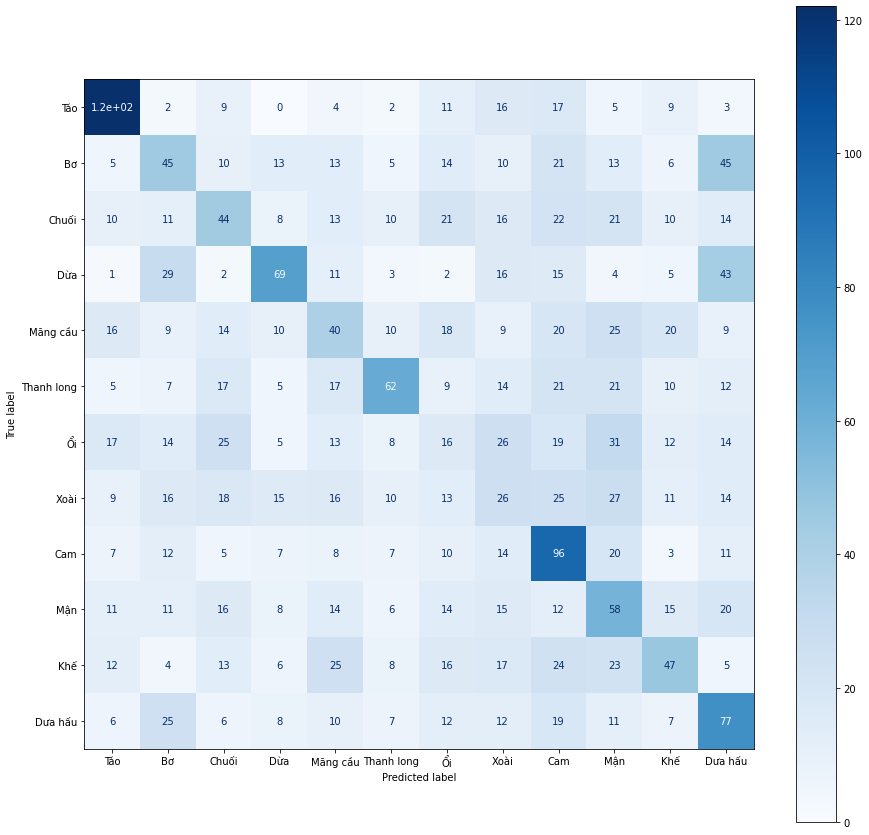

In [ ]:
Confusion_matrix(DTC_model, hog_x_test, y_test)

2. KNeighborsClassifier

In [ ]:
y_pred= KNN_model.predict(hog_x_test)

In [ ]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

        Apple       0.69      0.81      0.74       200
      Avocado       0.48      0.79      0.60       200
       Banana       0.70      0.68      0.69       200
      Coconut       0.67      0.77      0.71       200
Custard_apple       1.00      0.02      0.04       200
 Dragon_fruit       1.00      0.25      0.40       200
        Guava       0.40      0.50      0.45       200
        Mango       0.35      0.61      0.44       200
       Orange       0.52      0.87      0.65       200
         Plum       0.85      0.78      0.81       200
   Star_fruit       1.00      0.25      0.40       200
   Watermelon       0.62      0.59      0.61       200

     accuracy                           0.58      2400
    macro avg       0.69      0.58      0.54      2400
 weighted avg       0.69      0.58      0.54      2400



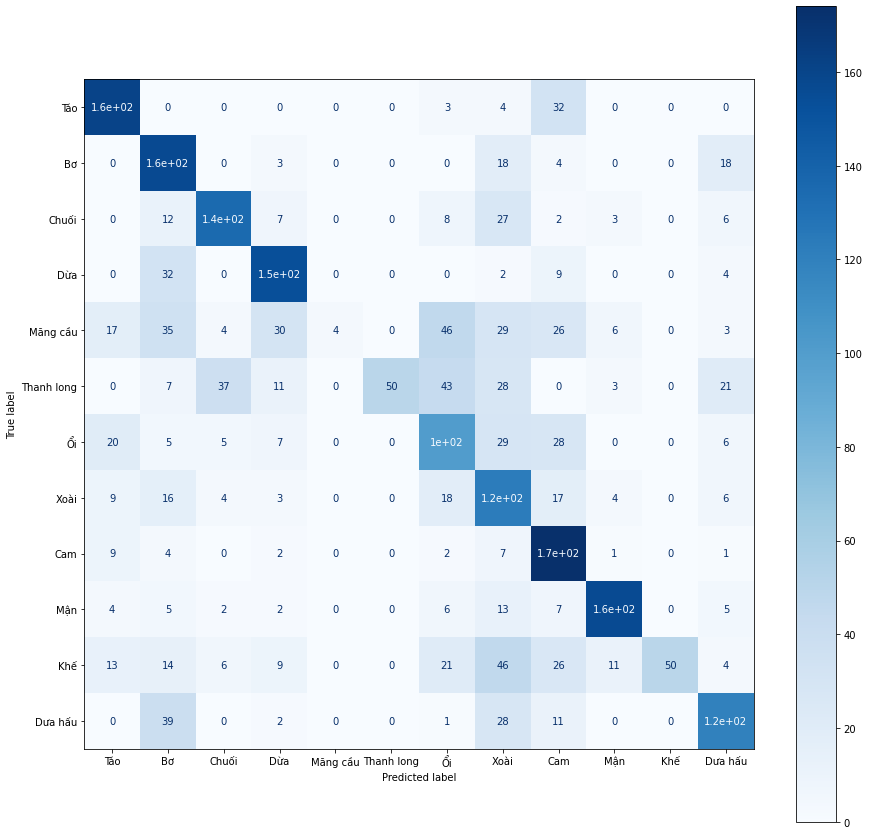

In [ ]:
Confusion_matrix(KNN_model, hog_x_test, y_test)

3. SVC - Support vector machine

In [ ]:
y_pred= SVC_model.predict(hog_x_test)


In [ ]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

        Apple       0.86      0.79      0.82       200
      Avocado       0.80      0.61      0.69       200
       Banana       0.71      0.89      0.79       200
      Coconut       0.94      0.76      0.84       200
Custard_apple       0.95      0.77      0.85       200
 Dragon_fruit       0.98      0.85      0.91       200
        Guava       0.67      0.65      0.66       200
        Mango       0.56      0.34      0.43       200
       Orange       0.68      0.95      0.79       200
         Plum       0.64      0.84      0.73       200
   Star_fruit       0.91      0.77      0.83       200
   Watermelon       0.57      0.83      0.67       200

     accuracy                           0.75      2400
    macro avg       0.77      0.75      0.75      2400
 weighted avg       0.77      0.75      0.75      2400



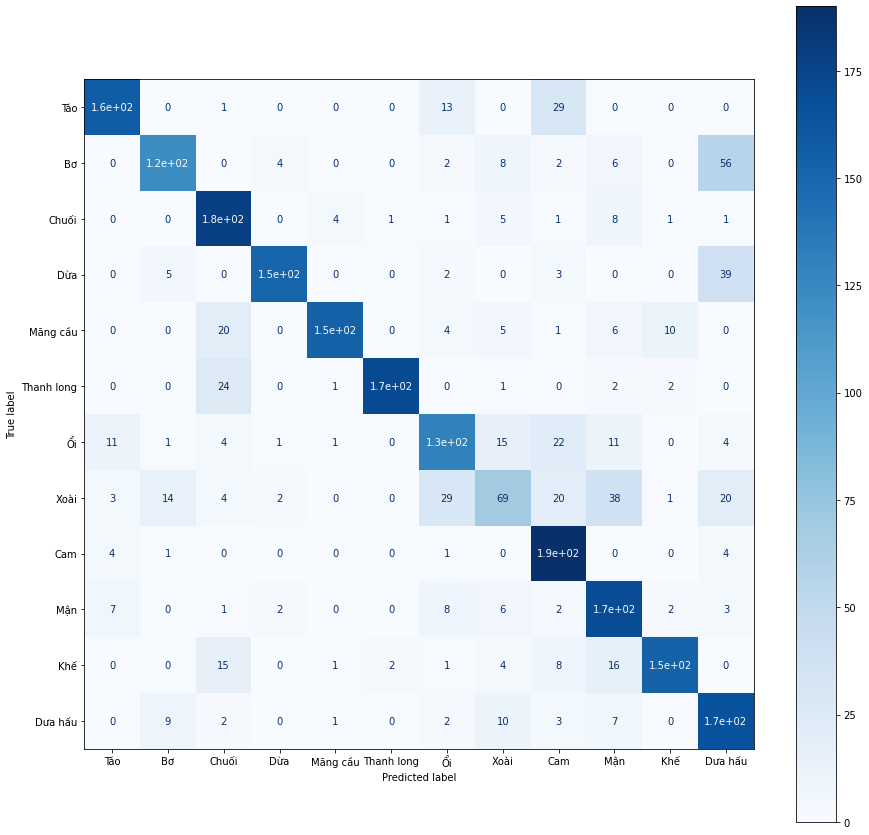

In [ ]:
Confusion_matrix(SVC_model, hog_x_test, y_test)

#Tinh chỉnh thông số

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [24]:
parameter= { 'C': [0.01, 0.1, 1.0, 10, 100, 1000]}

In [25]:
skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
fix_model= RandomizedSearchCV(SVC_model, parameter, cv= skf, scoring='accuracy')

In [28]:
search= fix_model.fit(hog_x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [29]:
search.best_params_

{'C': 10}

#Dự đoán

In [ ]:
def predict_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (256,256))
    feature= hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True)
    feature = feature.reshape(1, feature.shape[0])
    return fix_model.predict(feature)

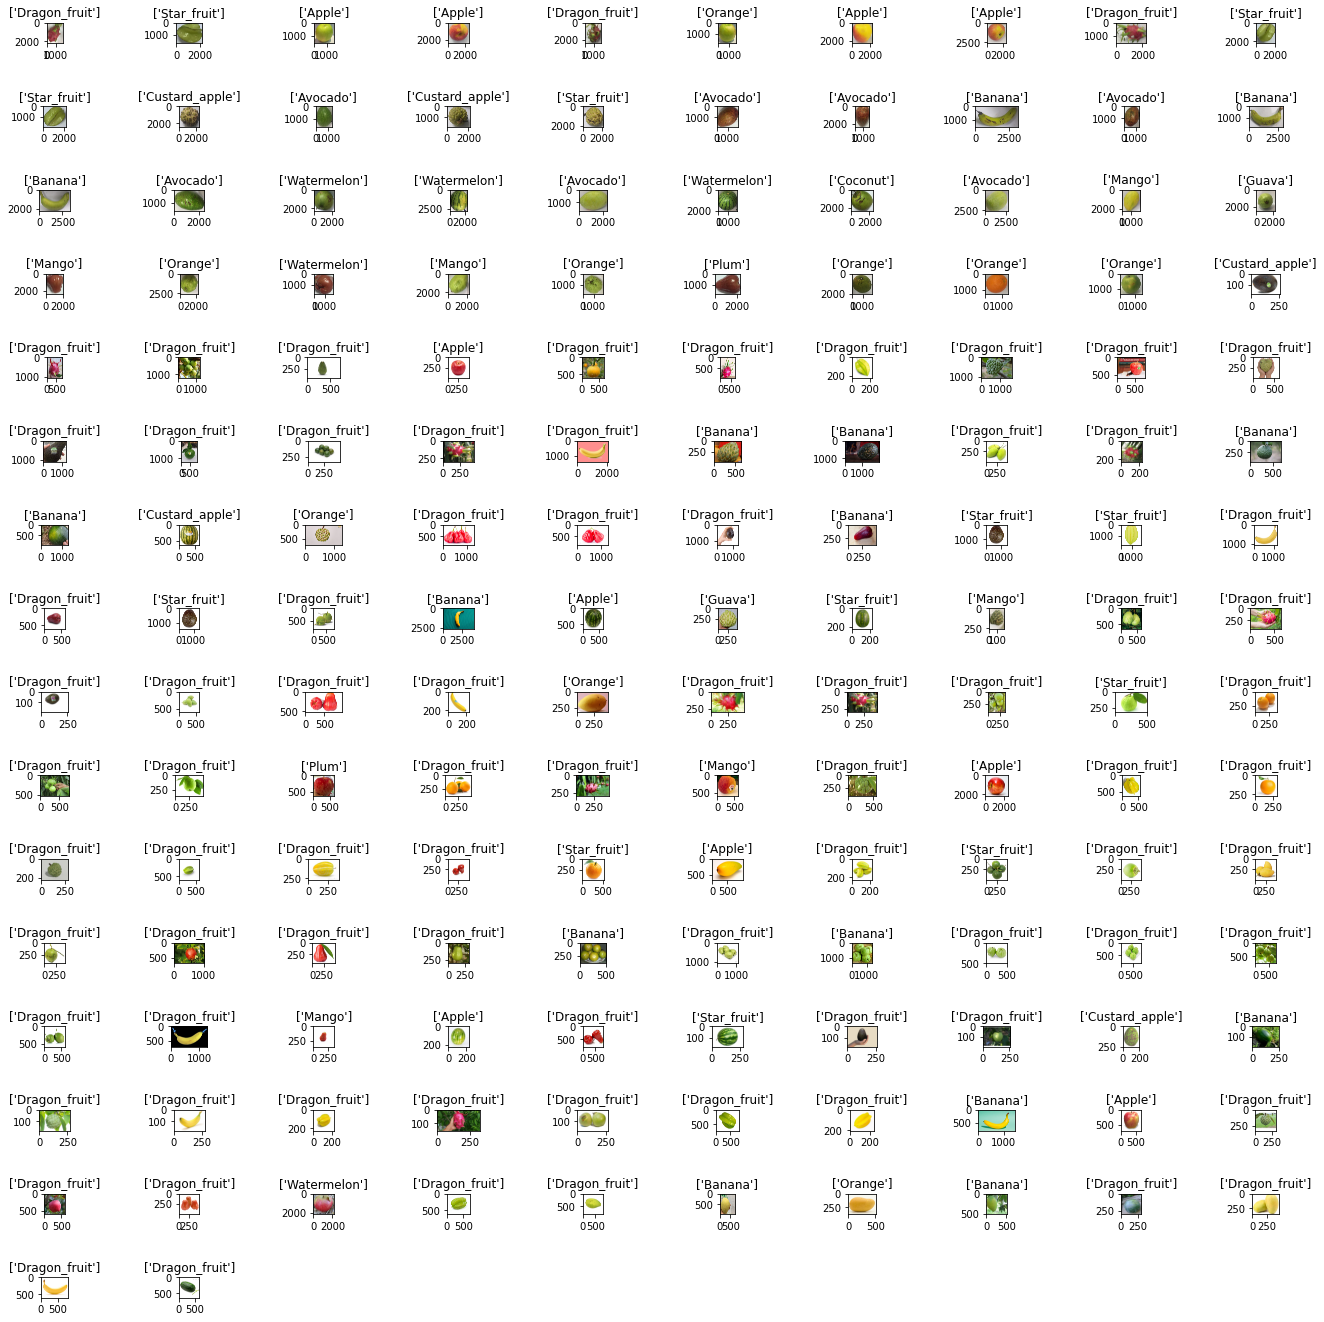

In [ ]:
fig = plt.figure(figsize=(19, 19))

columns = 10
rows = 16

ax = []

#Lấy link chứa các ảnh
image_link_list = []
for link in os.listdir("/content/gdrive/My Drive/Dataset/Predict dataset"):
    image_link_list.append(link)

for i in range(len(image_link_list)):
    
    link_image= "/content/gdrive/My Drive/Dataset/Predict dataset/"+image_link_list[i]
    #Load ảnh
    img = cv2.imread(link_image)
    ax.append( fig.add_subplot(rows, columns, i+1 ))
    #Dự đoán ảnh
    ax[-1].set_title(predict_image(link_image))
    #Chuyển màu
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #Giản cách các bức ảnh
    fig.tight_layout(pad=3.0)
    plt.imshow(img)

plt.show()  

#Nhận xét:
Accuracy: 49/152 = 0.32

|    Loại        | Số lượng đúng | Tổng | Tỉ lệ chính xác |
|:----------:|---------------|------|-----------------|
| Thanh long |       11      |  12  | 0.92            |
| Khế        |       7       |  13  | 0.54            |
| Táo        |       7       |  14  | 0.5             |
| Chuối      |       4       |  11  | 0.36            |
| Cam        |       3       |  14  | 0.21            |
| Mãng cầu   |       2       |  13  | 0.15            |
| Mận        |       1       |  13  | 0.08            |
| Ổi         |       1       |  13  | 0.08            |
| Bơ         |       7       |  15  | 0.47            |
| Dưa hấu    |       2       |   6  | 0.33            |
| Xoài       |       2       |  16  | 0.13            |
| Dừa        |       2       | 12   | 0.17            |

Nguyên nhân:
+ Do lúc train model bức ảnh chỉ chứa 1 trái, không tổng quát hết. Trong khi ảnh trên thực tế có thể là chùm trái
+ Có thể trong ảnh thực tế có background gây nhiễu nên dẫn đến tỉ lệ dự đoán không cao


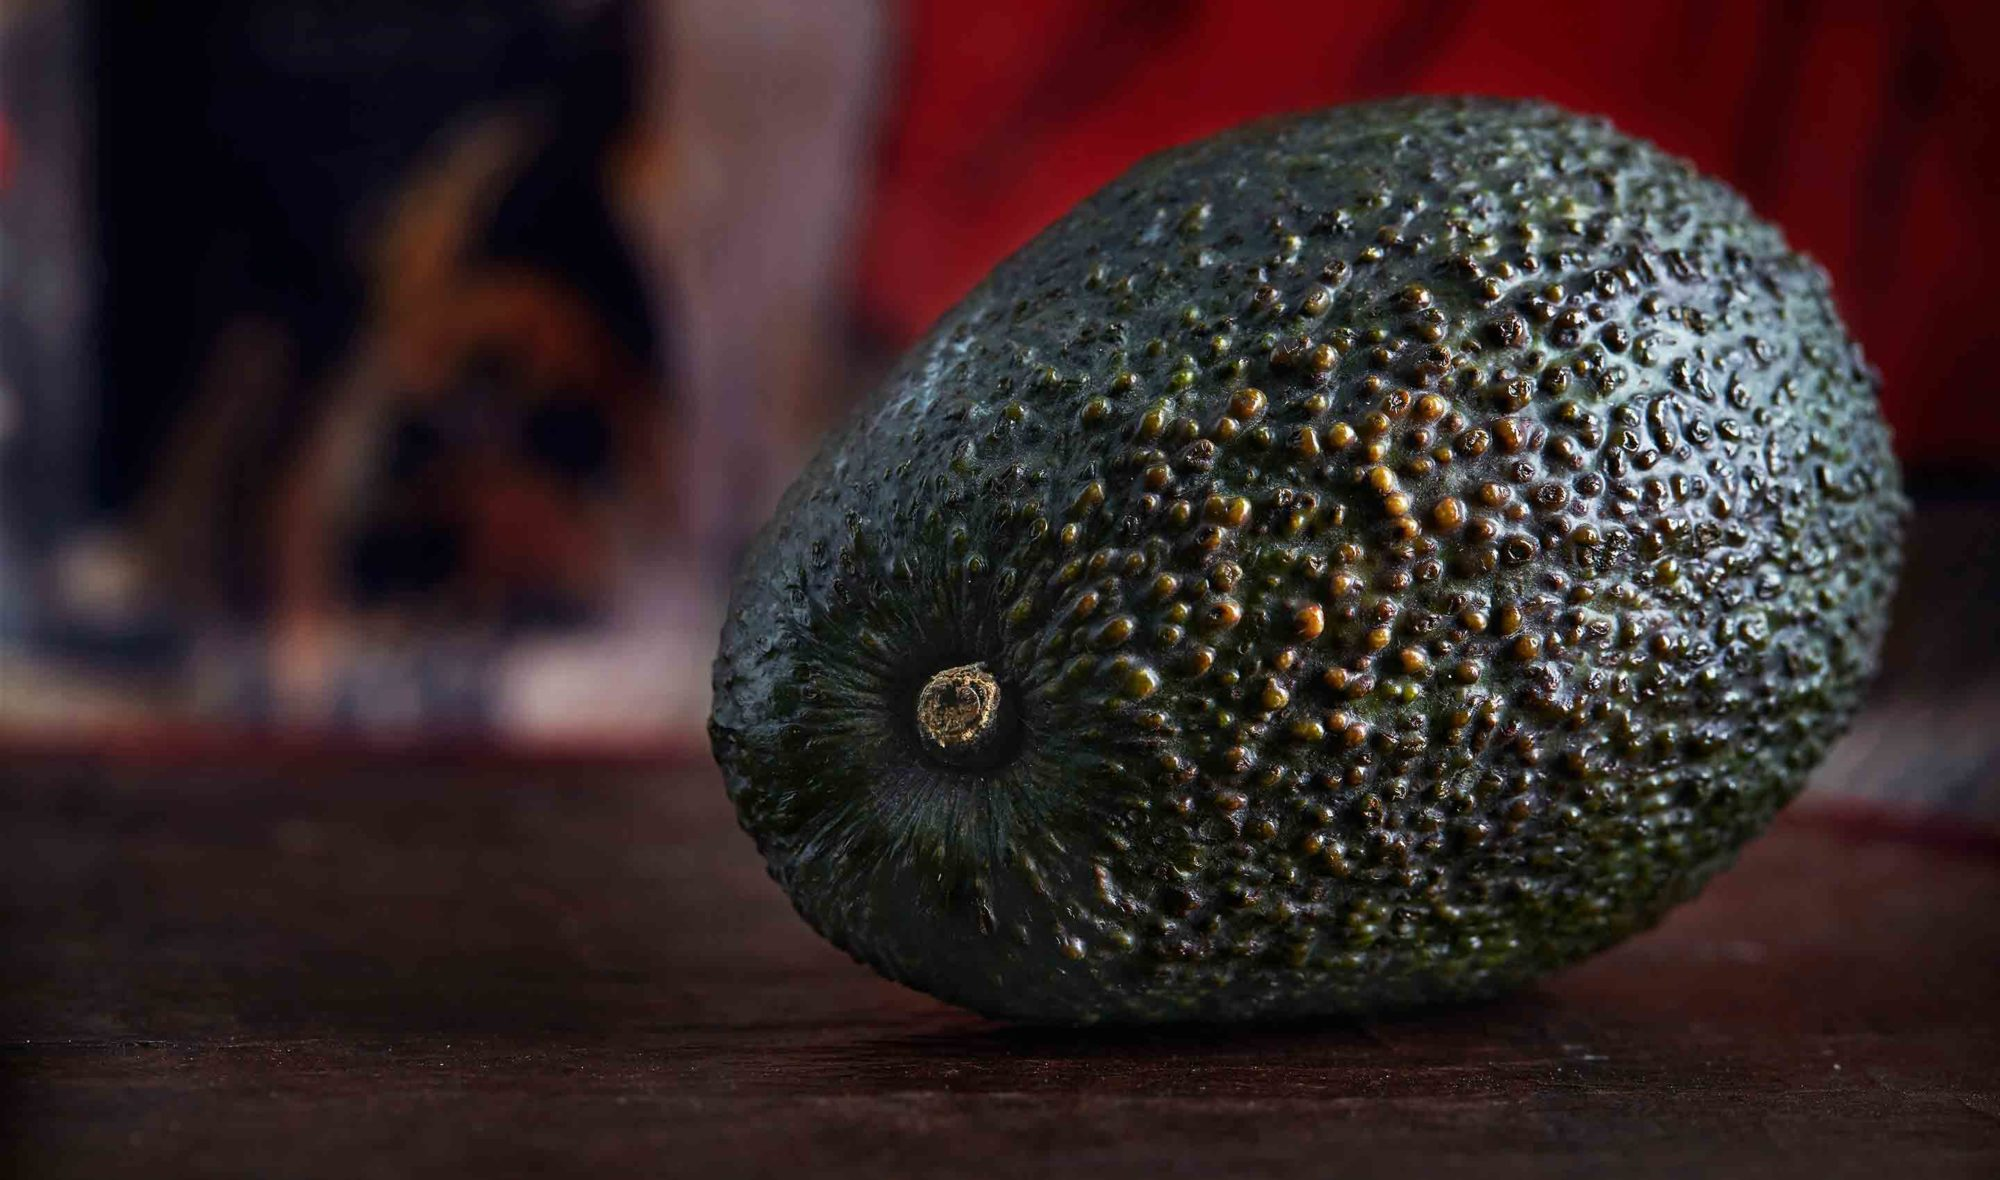

In [ ]:
#Background gây nhiễu
Image('/content/avocado-2000x1180.jpg')

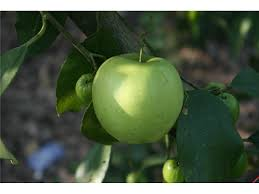

In [ ]:
Image('/content/images.jpeg')

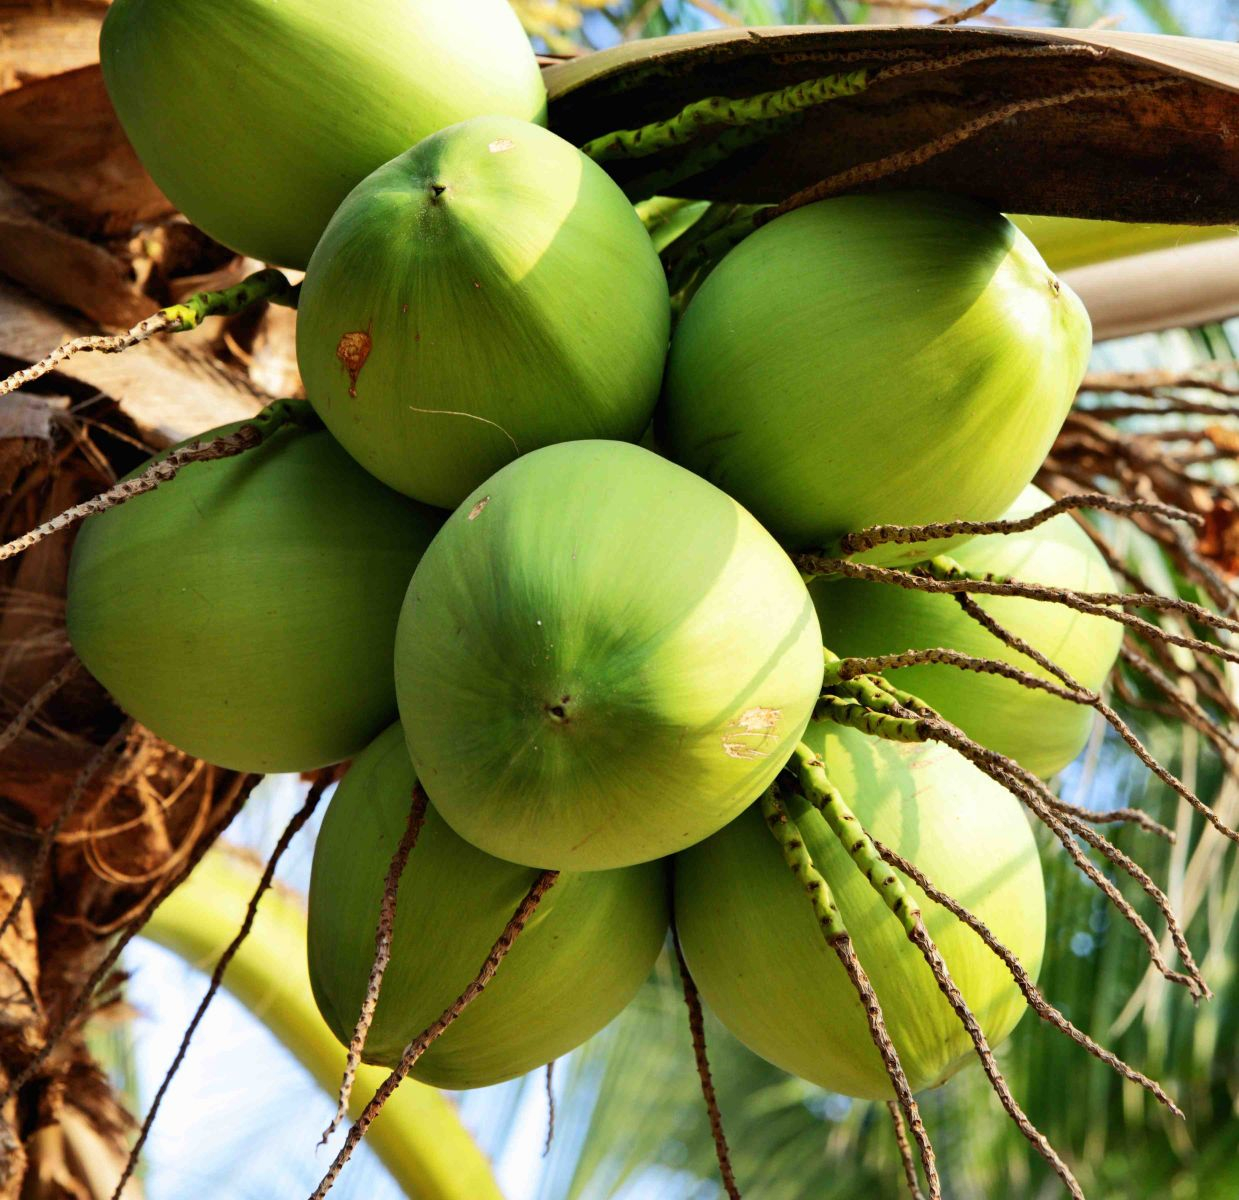

In [ ]:
#Ảnh chứa nhiều trái cùng loại
Image('/content/dua-xiem-ben-tre-1593576554284101912033.jpg')

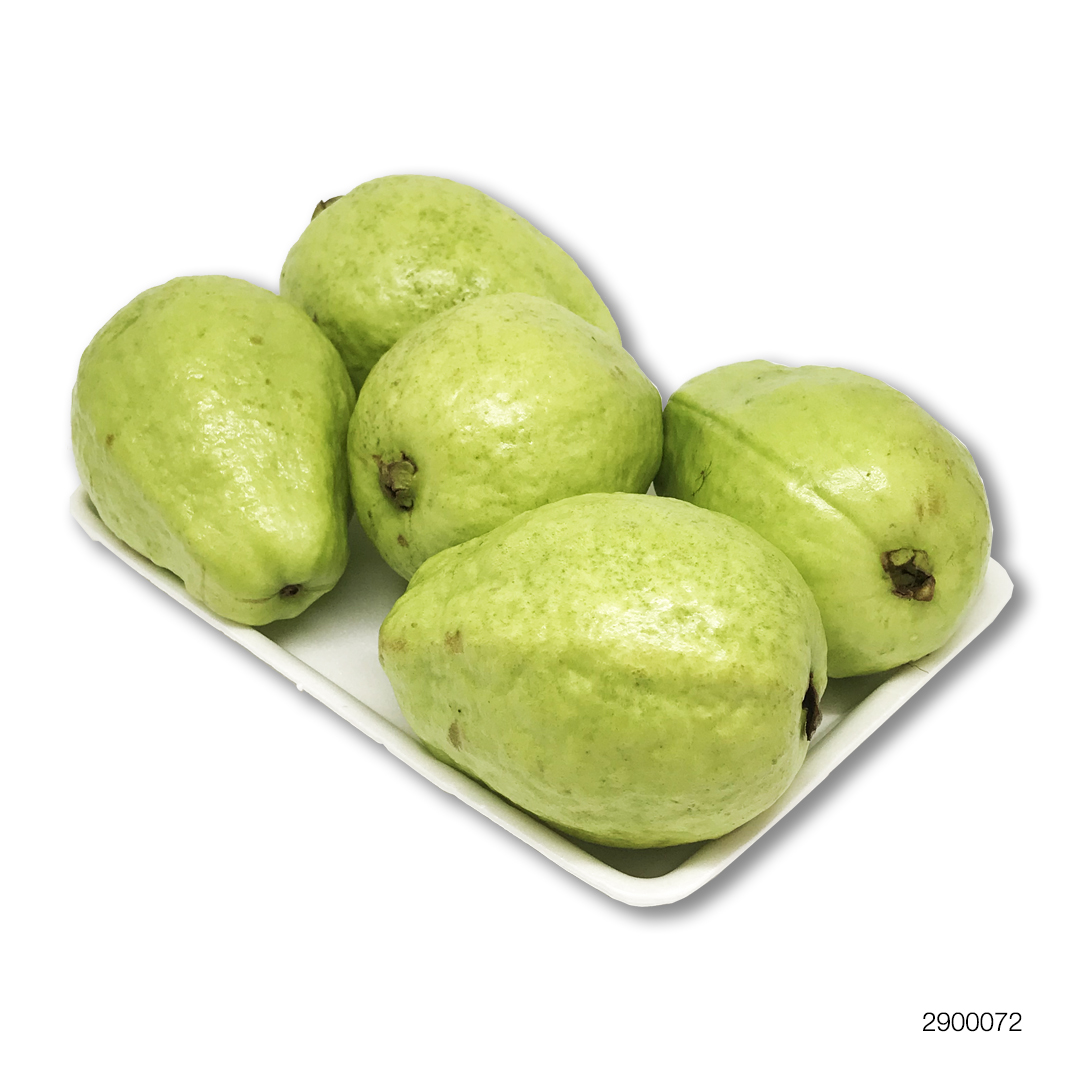

In [ ]:
Image('/content/Oi-Ngon-Ngot.jpg')